# Imports/Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
from pathlib import Path

%matplotlib inline

dotenv_path = Path('../.env')
load_dotenv(dotenv_path=dotenv_path)

conn = create_engine('postgresql://{0}:{1}@{2}:{3}/{4}'.format(os.getenv('DB_USER'),
                                                               os.getenv('DB_PASS'), 
                                                               os.getenv('DB_IP'), 
                                                               os.getenv('DB_PORT'), 
                                                               os.getenv('DB_NAME')))

# Download/Setup Data

In [2]:
dreampop_data = pd.read_sql("SELECT * FROM dreampop;", conn)
other_data = pd.read_sql("SELECT * FROM other;", conn)

In [3]:
#Combine data, drop non needed cols
data = dreampop_data.append(other_data, ignore_index=True)
data = data.drop(['index', 'type', 'uri', 'track_href', 'analysis_url'], axis=1)
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,name,artist,genre
0,0.420,0.330,9,-13.925,1,0.0275,0.24500,0.000679,0.0677,0.1750,157.143,1LzNfuep1bnAUR9skqdHCK,295600,3,Fade Into You,Mazzy Star,dreampop
1,0.512,0.838,0,-6.842,1,0.0310,0.01180,0.014200,0.1160,0.1950,117.992,1bwqV8EGVw1RLT3cEzxLpH,203390,4,Closer,Josha Daniel,dreampop
2,0.347,0.550,7,-9.048,1,0.0399,0.00419,0.049200,0.0992,0.0669,124.867,5TRSyGcFfevCbJHFUk4OB0,199680,4,Alive,Josha Daniel,dreampop
3,0.377,0.650,2,-5.902,1,0.0290,0.00174,0.000058,0.1070,0.3650,180.074,6sVQNUvcVFTXvlk3ec0ngd,192467,4,Cherry-coloured Funk,Cocteau Twins,dreampop
4,0.638,0.761,4,-7.945,0,0.1690,0.14700,0.000217,0.3210,0.3780,119.987,4uXWLG0CBQhJlvqPksiHxu,188000,4,High Enough,Lodola,dreampop


In [4]:
#Counts per genre
data.groupby('genre').count()[['id']].sort_values(by='id', ascending=False)

,id
genre,
dreampop,8235
acoustic,100
rainy-day,100
punk-rock,100
punk,100
...,...
emo,100
world-music,100
pop-film,96


In [5]:
#Create genre ids
genres = list(data.groupby('genre').count().index)
genre_to_id = {}
id_to_genre = {}
for i, g in enumerate(genres):
    genre_to_id[g] = i
    genre_to_id[i] = g

In [6]:
#Map genres
data['genre_id'] = data['genre'].apply(lambda x: genre_to_id[x])
data['is_dreampop'] = data['genre'].apply(lambda x: True if x == 'dreampop' else False)
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,name,artist,genre,genre_id,is_dreampop
0,0.420,0.330,9,-13.925,1,0.0275,0.24500,0.000679,0.0677,0.1750,157.143,1LzNfuep1bnAUR9skqdHCK,295600,3,Fade Into You,Mazzy Star,dreampop,28,True
1,0.512,0.838,0,-6.842,1,0.0310,0.01180,0.014200,0.1160,0.1950,117.992,1bwqV8EGVw1RLT3cEzxLpH,203390,4,Closer,Josha Daniel,dreampop,28,True
2,0.347,0.550,7,-9.048,1,0.0399,0.00419,0.049200,0.0992,0.0669,124.867,5TRSyGcFfevCbJHFUk4OB0,199680,4,Alive,Josha Daniel,dreampop,28,True
3,0.377,0.650,2,-5.902,1,0.0290,0.00174,0.000058,0.1070,0.3650,180.074,6sVQNUvcVFTXvlk3ec0ngd,192467,4,Cherry-coloured Funk,Cocteau Twins,dreampop,28,True
4,0.638,0.761,4,-7.945,0,0.1690,0.14700,0.000217,0.3210,0.3780,119.987,4uXWLG0CBQhJlvqPksiHxu,188000,4,High Enough,Lodola,dreampop,28,True


# Describe Data

In [7]:
#Unique values for categorical data
print('Genres: {0}'.format(len(data['genre_id'].unique())))
print('Keys: {0}'.format(len(data['key'].unique())))
print('Modes: {0}'.format(len(data['mode'].unique())))
print('Time Signatures: {0}'.format(len(data['time_signature'].unique())))

Genres: 127
Keys: 12
Modes: 2
Time Signatures: 5


In [8]:
#General Stats
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_id
count,20761.000000,20761.000000,20761.000000,20761.000000,20761.000000,20761.000000,20761.000000,20761.000000,20761.000000,20761.000000,20761.000000,2.076100e+04,20761.000000,20761.000000
mean,0.537225,0.649624,5.273927,-8.389939,0.656327,0.069612,0.263287,0.246456,0.195307,0.462399,122.814216,2.455854e+05,3.927990,49.260537
std,0.174270,0.246914,3.546615,4.742694,0.474945,0.087172,0.322665,0.351798,0.162233,0.257564,28.852951,9.738390e+04,0.362457,33.346463
min,0.000000,0.000000,0.000000,-45.393000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.056000e+03,0.000000,0.000000
25%,0.423000,0.491000,2.000000,-10.147000,0.000000,0.033700,0.005790,0.000005,0.096000,0.245000,100.338000,1.963070e+05,4.000000,28.000000
50%,0.549000,0.697000,5.000000,-7.233000,1.000000,0.043400,0.089800,0.005040,0.128000,0.445000,122.102000,2.328530e+05,4.000000,28.000000
75%,0.664000,0.854000,8.000000,-5.256000,1.000000,0.067700,0.477000,0.557000,0.250000,0.666000,140.031000,2.790000e+05,4.000000,74.000000
max,0.977000,1.000000,11.000000,3.282000,1.000000,0.961000,0.996000,0.995000,0.994000,0.998000,220.356000,4.719013e+06,5.000000,126.000000


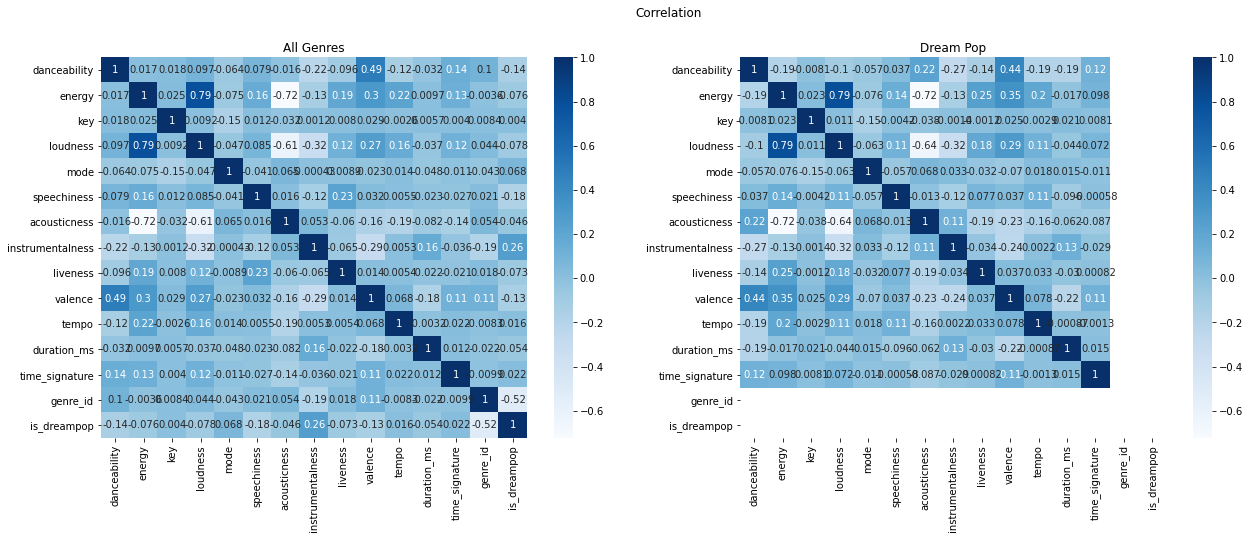

In [9]:
#Correlation
fig, axes = plt.subplots(1, 2, figsize=(21, 7))
fig.suptitle('Correlation')
axes[0].set_title('All Genres')
axes[1].set_title('Dream Pop')

corr_all = data.corr()
sns.heatmap(corr_all, cmap="Blues", annot=True, ax=axes[0])

corr_dreampop = data.loc[data['genre'] == 'dreampop'].corr()
sns.heatmap(corr_dreampop, cmap="Blues", annot=True, ax=axes[1])

plt.show()

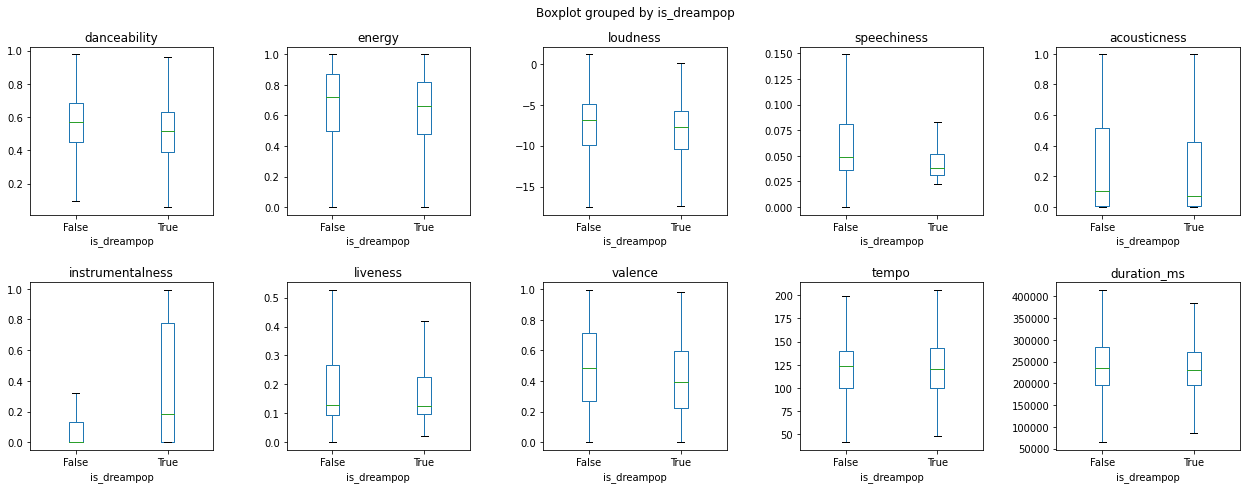

In [10]:
#Boxplots
cols = [['danceability', 'energy', 'loudness', 'speechiness', 'acousticness'], ['instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

fig_l, axes_l = plt.subplots(2, 5, figsize=(21, 7))
for i, row in enumerate(cols):
    for j, col in enumerate(cols[i]):
        data.boxplot(by='is_dreampop', column=[col], grid=False, showfliers=False, ax=axes_l[i][j])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

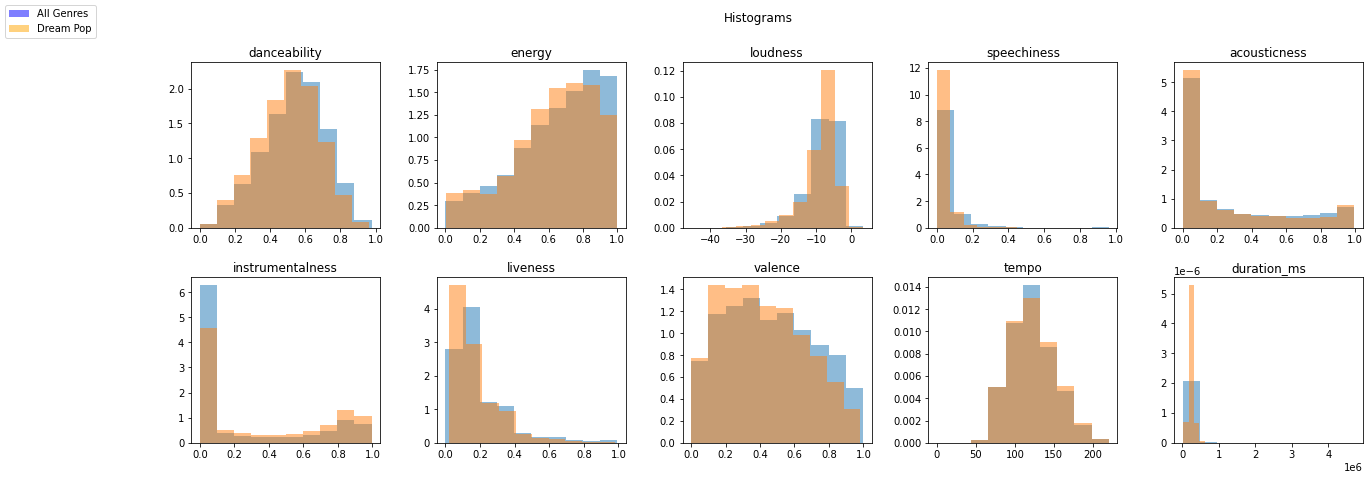

In [11]:
#Histograms
cols = [['danceability', 'energy', 'loudness', 'speechiness', 'acousticness'], ['instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

fig_l, axes_l = plt.subplots(2, 5, figsize=(21, 7))
for i, row in enumerate(cols):
    for j, col in enumerate(cols[i]):
        data.hist(column=[col], grid=False, ax=axes_l[i][j], density=True, alpha=0.5)
        data.loc[data['is_dreampop'] == True].hist(column=[col], grid=False, ax=axes_l[i][j], density=True, alpha=0.5)

legend_elements = [Patch(facecolor='blue', label='All Genres', alpha=0.5),
                   Patch(facecolor='orange', label='Dream Pop', alpha=0.5)]
fig_l.legend(handles=legend_elements, loc='upper left')
fig_l.suptitle('Histograms')
plt.show()